In [2]:
library(kernlab)
data(spam)
head(spam)

,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0,0.64,0.64,0,0.32,0,0,0,0,0,⋯,0,0,0,0.778,0,0,3.756,61,278,spam
2,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,⋯,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,spam
3,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,spam
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,⋯,0,0.137,0,0.137,0,0,3.537,40,191,spam
5,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,⋯,0,0.135,0,0.135,0,0,3.537,40,191,spam
6,0,0,0,0,1.85,0,0,1.85,0,0,⋯,0,0.223,0,0,0,0,3,15,54,spam


Warning message:
“In density.default(spam$your[spam$type == "spam"], col = "red") :
 extra argument ‘col’ will be disregarded”

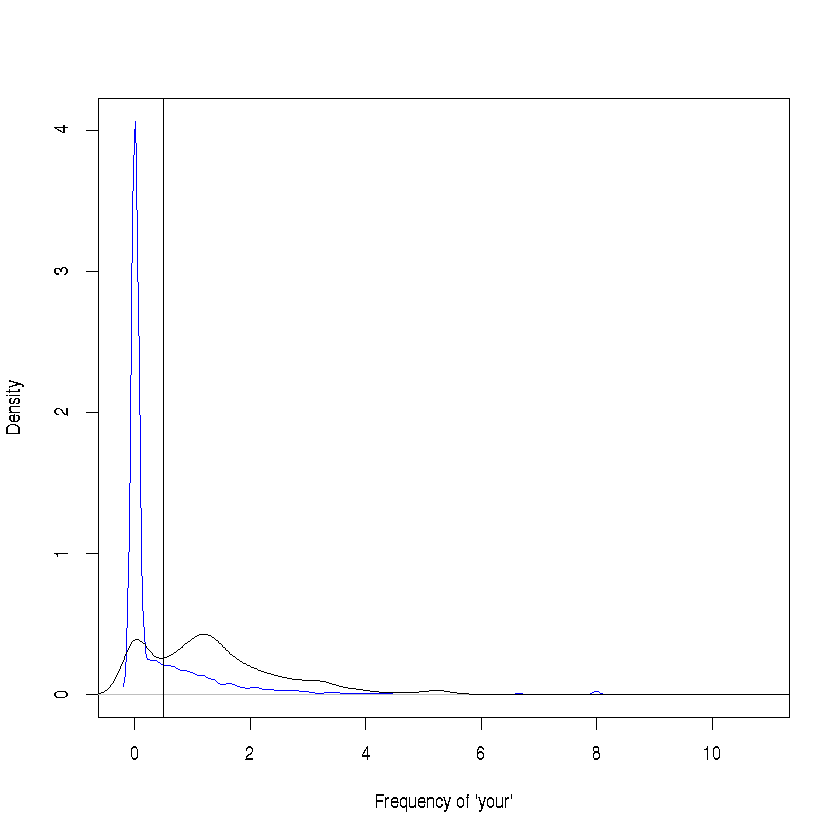

In [3]:
plot(density(spam$your[spam$type=="nonspam"]),col="blue",main="",xlab="Frequency of 'your'")
lines(density(spam$your[spam$type=="spam"],col="red"))
abline(v=0.5,col="black")


In [8]:
prediction <- ifelse(spam$your > 0.5,"spam","nonspam")
table(prediction,spam$type)/length(spam$type)

          
prediction   nonspam      spam
   nonspam 0.4590306 0.1017170
   spam    0.1469246 0.2923278

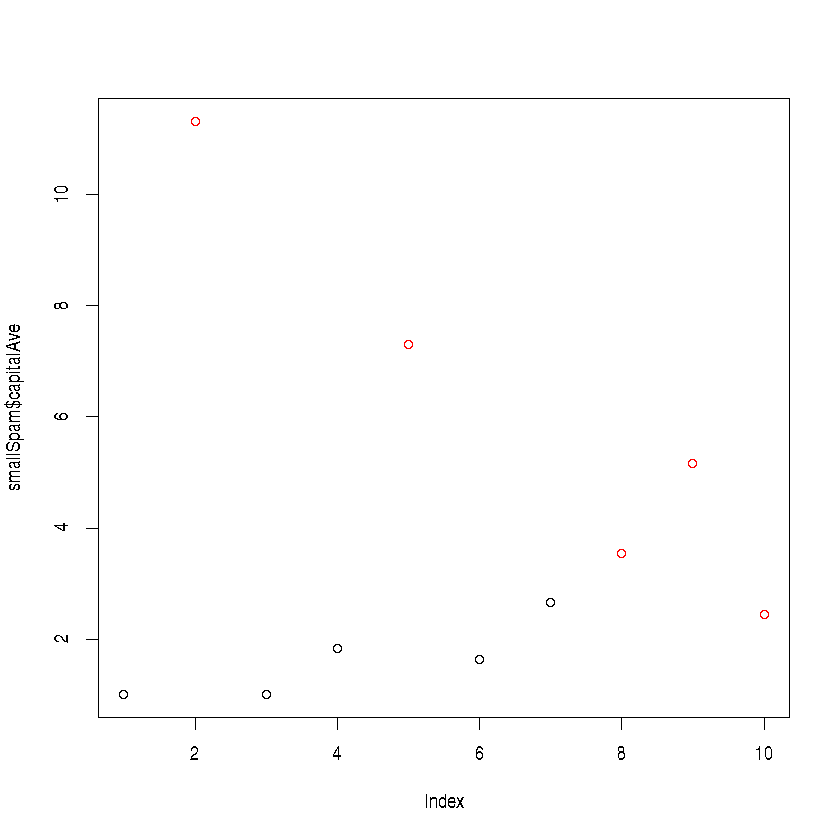

In [12]:
library(kernlab);
data(spam);
set.seed(333)
smallSpam<-spam[sample(dim(spam)[1],size=10),]
spamLabel<-(smallSpam$type=="spam")*1+1
plot(smallSpam$capitalAve,col=spamLabel)

In [17]:
rule1<-function(x){
    prediction<-rep(NA,length(x))
    prediction[x>2.7]="spam"
    prediction[x<2.40]="nonspam"
    prediction[(x>=2.40 && x<=2.45)]<-"spam"
    prediction[(x>2.45 && x<=2.70)]<-"nonspam"
    return(prediction)
}
table(rule1(smallSpam$capitalAve),smallSpam$type)

         
          nonspam spam
  nonspam       4    0
  spam          0    4

In [25]:
rule2<-function(x){
    prediction<-rep(NA,length(x))
    prediction[x>2.8]<-"spam"
    prediction[x<=2.8]<-"nonspam"
    return(prediction)
}
table(rule2(smallSpam$capitalAve),smallSpam$type)

         
          nonspam spam
  nonspam       5    1
  spam          0    4